# Описание проекта
В распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,

- выгрузка всех заказов за этот период,

- статистика рекламных расходов.

Необходимо помочь маркетологам оптимизировать маркетинговые затраты.

# Описание данных

Таблица **visits** (лог сервера с информацией о посещениях сайта):

- **uid** — уникальный идентификатор пользователя

- **device** — категория устройства пользователя

- **start_ts** — дата и время начала сессии

- **end_ts** — дата и время окончания сессии

- **source_id** — идентификатор рекламного источника, из которого пришел пользователь

Таблица **orders** (информация о заказах):

- **uid** — уникальный id пользователя, который сделал заказ

- **buy_ts** — дата и время заказа

- **revenue** — выручка Яндекс.Афиши с этого заказа

Таблица **costs** (информация о затратах на маркетинг):

- **source_id** — идентификатор рекламного источника

- **dt** — дата

- **costs** — затраты на этот рекламный источник в этот день



# Оглавление: 

### <a href='#step_1'>Шаг 1. Загрузка данных и подготовка их к анализу </a>
### <a href='#step_2'>Шаг 2. Построение отчётов и рассчет метрик</a>
#### <a href='#step_2.1'> Продукт</a>
#### <a href='#step_2.2'> Продажи</a>
#### <a href='#step_2.3'> Маркетинг</a>
### <a href='#step_3'>Шаг 3. Вывод. Рекомендации маркетологам, куда и сколько им стоит вкладывать денег</a>

## <a id='step_1'> Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visit = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 5. Анализ бизнес-показателей\visits_log.csv')
order = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 5. Анализ бизнес-показателей\orders_log.csv')
cost = pd.read_csv(r'C:\Users\Alex Kim\Desktop\Yandex Data Science Course\Спринт 5. Анализ бизнес-показателей\costs.csv')

In [3]:
display(visit.head())
print()
visit.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visit.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

visit['end_ts'] = pd.to_datetime(visit['end_ts'], format = '%Y-%m-%d %H:%M')
visit['start_ts'] = pd.to_datetime(visit['start_ts'], format = '%Y-%m-%d %H:%M')

visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
display(order.head())
print()
order.info()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
order.columns = ['buy_ts', 'revenue', 'uid']
order['buy_ts'] = pd.to_datetime(order['buy_ts'], format = '%Y-%m-%d %H:%M')
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
display(cost.head())
print()
cost.info()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
cost['dt'] = pd.to_datetime(cost['dt'], format='%Y-%m-%d')
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [9]:
print(visit.isna().mean())
print(order.isna().mean())
print(cost.isna().mean())

device       0.0
end_ts       0.0
source_id    0.0
start_ts     0.0
uid          0.0
dtype: float64
buy_ts     0.0
revenue    0.0
uid        0.0
dtype: float64
source_id    0.0
dt           0.0
costs        0.0
dtype: float64


In [10]:
print(visit.duplicated().sum())
print(order.duplicated().sum())
print(cost.duplicated().sum())

0
0
0


## <a id='step_2'> Шаг 2. Построение отчётов и рассчет метрик
## <a id='step_2.1'> Продукт
### Сколько людей пользуются в день, неделю, месяц?

In [11]:
visit.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
visit['ts_year']  = visit['start_ts'].dt.year
visit['ts_month'] = visit['start_ts'].dt.month
visit['ts_week']  = visit['start_ts'].dt.week
visit['ts_date'] = visit['start_ts'].dt.date

In [13]:
visit.head()

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


### Среднее количество уникальных пользователей в день:

In [14]:
print('Среднее количество уникальных пользователей в день:', int(visit.groupby(['ts_date']).agg({'uid':'nunique'}).mean()))

Среднее количество уникальных пользователей в день: 907


#### В разрезе по устройствам:

In [15]:
visit.pivot_table(index='ts_date', columns='device', values='uid', aggfunc='nunique').mean()

device
desktop    659.244505
touch      252.873278
dtype: float64

#### В разрезе по источникам:

In [16]:
visit.pivot_table(index='ts_date', columns='source_id', values='uid', aggfunc='nunique').mean().sort_values(ascending=False)

source_id
4     275.454545
3     232.865014
5     175.622590
2     120.707989
1      80.557692
9      36.110193
10     26.033058
7       1.058824
6       1.000000
dtype: float64

### Среднее количество уникальных пользователей в неделю:

In [17]:
print('Среднее количество уникальных пользователей в неделю:', int(visit.groupby(['ts_year', 'ts_month', 'ts_week']).agg({'uid':'nunique'}).mean()))

Среднее количество уникальных пользователей в неделю: 4911


#### В разрезе по устройствам:

In [18]:
visit.pivot_table(index='ts_week', columns='device', values='uid', aggfunc='nunique').mean()

device
desktop    4208.173077
touch      1666.230769
dtype: float64

#### В разрезе по источникам:

In [19]:
visit.pivot_table(index='ts_week', columns='source_id', values='uid', aggfunc='nunique').mean().sort_values(ascending=False)

source_id
4     1864.365385
3     1596.000000
5     1189.903846
2      729.192308
1      472.173077
9      243.288462
10     169.750000
7        1.333333
6        1.000000
dtype: float64

### Среднее количество уникальных пользователей в месяц:

In [20]:
print('Среднее количество уникальных пользователей в месяц:', int(visit.groupby(['ts_year', 'ts_month']).agg({'uid':'nunique'}).mean()))

Среднее количество уникальных пользователей в месяц: 23228


#### В разрезе по устройствам:

In [21]:
visit.pivot_table(index='ts_month', columns='device', values='uid', aggfunc='nunique').mean()

device
desktop    16724.916667
touch       6825.916667
dtype: float64

#### В разрезе по источникам: 

In [22]:
visit.pivot_table(index='ts_month', columns='source_id', values='uid', aggfunc='nunique').mean().sort_values(ascending=False)

source_id
4     7765.666667
3     6758.833333
5     5017.916667
2     2752.083333
1     1818.750000
9      987.000000
10     707.000000
7        2.833333
6        1.000000
dtype: float64

Независимо от периода (день/неделя/месяц) пользователи чаще заходят с настольных устройств. А самыми популярными источниками являются №4, №3, №5 и №2

### Сколько сессий в день?


In [23]:
sessions_per_user = visit.groupby(['ts_date']).agg({'uid':['nunique', 'count']})
sessions_per_user.columns = ['n_users', 'n_sessions']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_users,n_sessions,sessions_per_user
ts_date,,,
2017-06-01,605,664,1.097521
2017-06-02,608,658,1.082237
2017-06-03,445,477,1.071910
2017-06-04,476,510,1.071429
2017-06-05,820,893,1.089024
...,...,...,...
2018-05-27,620,672,1.083871
2018-05-28,1039,1156,1.112608
2018-05-29,948,1035,1.091772


#### Количество сессий в день в разрезе устройств

In [24]:
visit.pivot_table(index='ts_date', columns='device', values='uid', aggfunc='count').mean()

device
desktop    721.337912
touch      266.757576
dtype: float64

#### Количество сессий в день в разрезе источников:

In [25]:
visit.pivot_table(index='ts_date', columns='source_id', values='uid', aggfunc='count').mean().sort_values(ascending=False)

source_id
4     280.424242
3     235.840220
5     184.311295
2     131.201102
1      93.739011
9      36.575758
10     27.617080
7       1.058824
6       1.000000
dtype: float64

In [26]:
sessions_per_user['sessions_per_user'].mean()

1.0821696440039723

Полученное значение говорит о том, что большинство пользователей посещают сайт Яндекс.Афиша не более одного раза за сутки независимо от устройства/источника

### Сколько длится одна сессия?

In [27]:
((visit['end_ts'] - visit['start_ts']).dt.seconds).mean()

643.506488592098

Text(0, 0.5, 'Количество сессий')

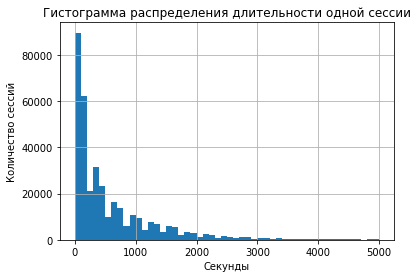

In [28]:
((visit['end_ts'] - visit['start_ts']).dt.seconds).hist(bins=50, range = (0,5000))
plt.title('Гистограмма распределения длительности одной сессии')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

In [29]:
((visit['end_ts'] - visit['start_ts']).dt.seconds).value_counts()

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
16080        1
13920        1
21600        1
24420        1
25200        1
Length: 312, dtype: int64

In [30]:
53029 / len(visit) * 100

14.754869226488593

In [31]:
((visit['end_ts'] - visit['start_ts']).dt.seconds).median()

300.0

Среднее значение составляет 643 секунды, но как видно из гистограммы распределения длительности сессии, высокое среднее значение достигается за счет выбросов. 

Наиболее встречаемое значение (мода) составляет 60 секунд. Но длительность сессий с таким значением составляет лишь 14.75% от общего числа сессий. 

Поэтому за показатель, наиболее достоверно отображающий длительность сессии возьмем медиану, которая составляет 300 секунд. Таким образом, будем считать, что в среднем длительность одной сессии составляет 5 минут.  

### Длительность сессии на разных устройствах:

In [32]:
visit['duration'] = (visit['end_ts'] - visit['start_ts']).dt.seconds

Text(0, 0.5, 'Количество сессий')

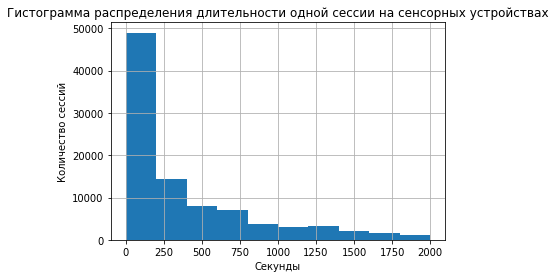

In [33]:
visit[visit['device'] == 'touch']['duration'].hist(range=(0,2000))
plt.title('Гистограмма распределения длительности одной сессии на сенсорных устройствах')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

Text(0, 0.5, 'Количество сессий')

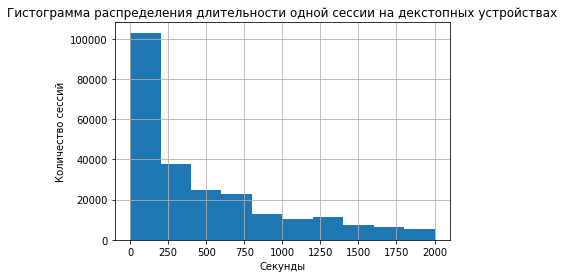

In [34]:
visit[visit['device'] == 'desktop']['duration'].hist(range=(0,2000))
plt.title('Гистограмма распределения длительности одной сессии на декстопных устройствах')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

In [35]:
visit[visit['device'] == 'touch']['duration'].median()

180.0

In [36]:
visit[visit['device'] == 'desktop']['duration'].median()

360.0

In [37]:
visit['duration'].median()

300.0

В среднем пользователи в два раза больше (360 против 180 секунд) проводят времени на сайте с десктопных устройств 

### Как часто люди возвращаются?

In [38]:
visit

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [39]:
first_visit_date = visit.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
first_visit_date

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit_date, Length: 228169, dtype: datetime64[ns]

In [40]:
visit = visit.join(first_visit_date,on='uid')
visit.sample(10)

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,duration,first_visit_date
51246,desktop,2017-12-15 13:30:00,4,2017-12-15 13:30:00,3210529905072442180,2017,12,50,2017-12-15,0,2017-12-15 13:30:00
101754,desktop,2018-01-28 11:53:00,4,2018-01-28 11:50:00,11166393322343860734,2018,1,4,2018-01-28,180,2018-01-28 11:50:00
319744,desktop,2018-05-21 15:25:00,4,2018-05-21 15:24:00,18424199897439238302,2018,5,21,2018-05-21,60,2017-12-06 18:48:00
238745,desktop,2017-11-21 09:12:00,3,2017-11-21 08:29:00,1735301600295572577,2017,11,47,2017-11-21,2580,2017-10-31 23:51:00
171426,desktop,2017-08-07 21:16:00,3,2017-08-07 21:14:00,15172937556589634447,2017,8,32,2017-08-07,120,2017-08-07 21:14:00
293321,desktop,2017-11-11 15:49:00,3,2017-11-11 15:15:00,9011163116492406111,2017,11,45,2017-11-11,2040,2017-11-11 15:15:00
301660,desktop,2018-03-05 14:57:00,5,2018-03-05 14:45:00,12914639479527105720,2018,3,10,2018-03-05,720,2017-06-01 13:32:00
34780,desktop,2017-09-23 11:34:00,3,2017-09-23 10:32:00,13427627799588656418,2017,9,38,2017-09-23,3720,2017-07-22 22:23:00
90145,desktop,2018-02-26 11:53:00,5,2018-02-26 11:48:00,9985443616511831746,2018,2,9,2018-02-26,300,2018-02-26 11:48:00
177145,desktop,2018-05-01 14:21:00,5,2018-05-01 14:21:00,1082513431302836257,2018,5,18,2018-05-01,0,2017-06-07 15:57:00


In [41]:
visit['visit_month'] = visit['start_ts'].astype('datetime64[M]')
visit['first_visit_month'] = visit['first_visit_date'].astype('datetime64[M]')

visit['cohort_lifetime'] = visit['visit_month'] - visit['first_visit_month']
visit['cohort_lifetime'] = visit['cohort_lifetime'] / np.timedelta64(1,'M')
visit['cohort_lifetime'] = visit['cohort_lifetime'].round().astype('int')

In [42]:
visit.sample(5)

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,duration,first_visit_date,visit_month,first_visit_month,cohort_lifetime
316562,desktop,2017-10-30 10:04:00,3,2017-10-30 09:47:00,7769661456035845968,2017,10,44,2017-10-30,1020,2017-10-30 09:47:00,2017-10-01,2017-10-01,0
173837,desktop,2017-06-07 11:18:00,5,2017-06-07 11:13:00,11060612381278529862,2017,6,23,2017-06-07,300,2017-06-07 11:13:00,2017-06-01,2017-06-01,0
219266,touch,2018-04-23 00:03:00,2,2018-04-22 23:35:00,11897763080734431833,2018,4,16,2018-04-22,1680,2017-10-11 22:47:00,2018-04-01,2017-10-01,6
286674,desktop,2018-03-11 10:50:00,1,2018-03-11 10:48:00,9166909989308227119,2018,3,10,2018-03-11,120,2017-06-15 16:11:00,2018-03-01,2017-06-01,9
90986,desktop,2017-12-17 17:13:00,4,2017-12-17 17:11:00,7806256720637628646,2017,12,50,2017-12-17,120,2017-12-17 17:11:00,2017-12-01,2017-12-01,0


In [43]:
visit_cohorts = visit.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
visit_cohorts

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [44]:
initial_visiters_count = visit_cohorts[visit_cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_visiters_count = initial_visiters_count.rename(columns={'uid':'cohort_visiters'})
initial_visiters_count

,first_visit_month,cohort_visiters
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [45]:
visit_cohorts = visit_cohorts.merge(initial_visiters_count, on='first_visit_month')
visit_cohorts

,first_visit_month,cohort_lifetime,uid,cohort_visiters
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [46]:
visit_cohorts['retention'] = visit_cohorts['uid'] / visit_cohorts['cohort_visiters'] 
visit_cohorts

,first_visit_month,cohort_lifetime,uid,cohort_visiters,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [47]:
retention_visits = visit_cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_visits

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


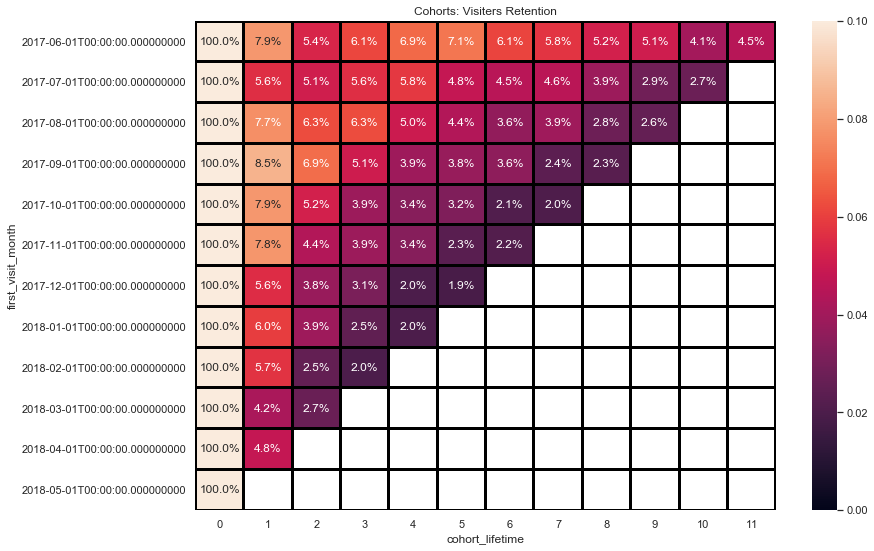

In [48]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Visiters Retention')
sns.heatmap(retention_visits, annot=True, fmt='.1%', linewidths=2, linecolor='black', vmin= 0, vmax= 0.1)

In [49]:
visit.groupby(['ts_year', 'ts_month']).agg({'uid':['nunique', 'count']})

uid       
                 nunique  count
ts_year ts_month               
2017    6          13259  16505
        7          14183  17828
        8          11631  14355
        9          18975  23907
        10         29692  37903
        11         32797  43969
        12         31557  41983
2018    1          28716  36939
        2          28749  37182
        3          27473  35679
        4          21008  26515
        5          20701  26635

Retention самой первой (июньской) когорты достаточно высок относительно других когорт. Особенно заметна эта разница начиная с 5-го lifetime. 

В целом, по всем когортам наблюдается убывающий тренд. Только у июньской и июльской когорт наблюдается рост показателя в осенние месяцы. Это можно связать с фактором сезонности: как видно из таблицы выше, в октябре-ноябре-декабре наблюдалось значительное увеличение количества посетителей сайта.  

## <a id='step_2.2'> Продажи
### Когда люди начинают покупать:
#### - Сколько времени проходит после первого визита до первой покупки?

In [50]:
first_buy_date = order.groupby(['uid'])['buy_ts'].min()
first_buy_date.name = 'first_buy_date'
first_buy_date

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: first_buy_date, Length: 36523, dtype: datetime64[ns]

In [51]:
first_visit = visit.groupby('uid')['start_ts'].min()

In [52]:
first_visit

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: start_ts, Length: 228169, dtype: datetime64[ns]

In [53]:
first_buy = first_buy_date.to_frame()

In [54]:
first_visit_buy = first_buy.merge(first_visit, on='uid')

In [55]:
first_visit_buy

,first_buy_date,start_ts
uid,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00


In [56]:
display(visit[visit['uid'] == 2429014661409475]) #проверка правильно ли присоединилась дата первого визита 
display(order[order['uid'] == 2429014661409475])                                   #с датой первой покупки 

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,duration,first_visit_date,visit_month,first_visit_month,cohort_lifetime
344066,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2429014661409475,2017,10,41,2017-10-11,780,2017-10-11 17:14:00,2017-10-01,2017-10-01,0


,buy_ts,revenue,uid
12235,2017-10-11 18:33:00,73.33,2429014661409475


In [57]:
first_visit_buy['time_to_buy'] = (first_visit_buy['first_buy_date'] - first_visit_buy['start_ts']).dt.days

In [58]:
first_visit_buy['time_to_buy'].value_counts()

0      26363
1       1011
2        563
3        434
4        324
       ...  
348        1
346        1
325        1
315        1
312        1
Name: time_to_buy, Length: 345, dtype: int64

In [59]:
26363  / len(first_visit_buy) * 100

72.18191276729732

Text(0, 0.5, 'Количество сессий')

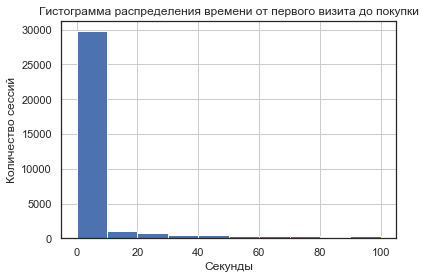

In [60]:
first_visit_buy['time_to_buy'].hist(range=(0,100))
plt.title('Гистограмма распределения времени от первого визита до покупки')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

In [61]:
first_visit_buy['time_to_buy'].median()

0.0

Модальное значение времени от первого визита до первой покупки составляет 0 дней, т.е. пользователи совершают покупку в день своего захода на сайт. Здесь уже резонно в качестве среднего показателя брать моду, так как на него приходиться 72% от всех значений. Медианное значение тоже составляет 0 дней. 

In [62]:
device_time_to_buy = first_visit_buy.merge(visit[['device', 'start_ts', 'uid']], on=['start_ts', 'uid'], how='left')

In [63]:
device_time_to_buy

,first_buy_date,uid,start_ts,time_to_buy,device
0,2018-01-03 21:51:00,313578113262317,2017-09-18 22:49:00,106,desktop
1,2017-06-03 10:13:00,1575281904278712,2017-06-03 10:13:00,0,touch
2,2017-10-11 18:33:00,2429014661409475,2017-10-11 17:14:00,0,desktop
3,2018-01-28 15:54:00,2464366381792757,2018-01-27 20:10:00,0,desktop
4,2017-11-24 10:14:00,2551852515556206,2017-11-24 10:14:00,0,desktop
...,...,...,...,...,...
36518,2017-11-24 09:03:00,18445147675727495770,2017-08-20 13:30:00,95,touch
36519,2017-09-22 23:55:00,18445407535914413204,2017-09-22 23:48:00,0,desktop
36520,2018-03-26 22:54:00,18445601152732270159,2017-08-07 11:51:00,231,desktop
36521,2018-02-18 19:34:00,18446156210226471712,2017-11-07 10:01:00,103,desktop


Text(0, 0.5, 'Количество сессий')

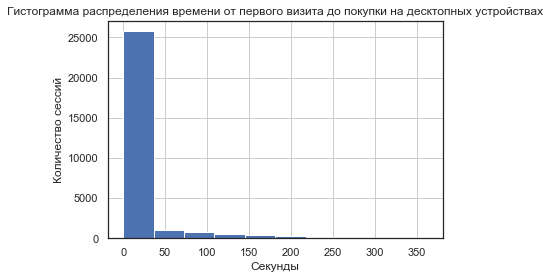

In [64]:
device_time_to_buy[device_time_to_buy['device'] == 'desktop']['time_to_buy'].hist()
plt.title('Гистограмма распределения времени от первого визита до покупки на десктопных устройствах')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

In [65]:
device_time_to_buy[device_time_to_buy['device'] == 'desktop']['time_to_buy'].describe()

count    29211.000000
mean        15.848550
std         46.049272
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        363.000000
Name: time_to_buy, dtype: float64

Text(0, 0.5, 'Количество сессий')

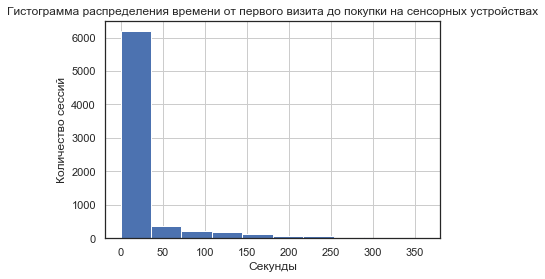

In [66]:
device_time_to_buy[device_time_to_buy['device'] == 'touch']['time_to_buy'].hist()
plt.title('Гистограмма распределения времени от первого визита до покупки на сенсорных устройствах')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')

In [67]:
device_time_to_buy[device_time_to_buy['device'] == 'touch']['time_to_buy'].describe()

count    7312.000000
mean       20.250684
std        50.279669
min         0.000000
25%         0.000000
50%         0.000000
75%         6.000000
max       362.000000
Name: time_to_buy, dtype: float64

Время между визитом и покупкой составляет 0 дней (т.е. совершается в тот же самый день) независимо от платформы, с которой покупатель зашел на сайт.

### Сколько раз покупают за период?

In [68]:
order.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [69]:
print(order['buy_ts'].min())
order['buy_ts'].max()

2017-06-01 00:10:00


Timestamp('2018-06-01 00:02:00')

In [70]:
order = order.join(first_buy_date,on='uid')
order.sample(10)

,buy_ts,revenue,uid,first_buy_date
49716,2018-05-30 16:25:00,0.73,14321235965313951379,2018-05-30 16:25:00
41374,2018-03-23 15:03:00,4.28,6390452570731110490,2018-03-23 15:03:00
33035,2018-02-05 14:01:00,2.44,14014662322115337660,2018-01-17 10:18:00
1787,2017-06-22 15:18:00,4.03,7784369279854430084,2017-06-22 15:18:00
30300,2018-01-21 11:56:00,4.28,6541848833106817468,2018-01-21 11:56:00
10450,2017-10-03 22:42:00,0.98,13151952361683540192,2017-10-03 22:42:00
16085,2017-11-04 13:43:00,3.67,11823721099530627820,2017-11-04 13:43:00
11169,2017-10-06 16:11:00,0.18,4848576016029470300,2017-06-06 09:34:00
31763,2018-01-30 00:31:00,8.55,13193007416497363993,2018-01-30 00:31:00
10236,2017-10-03 10:02:00,0.55,2978059511407590509,2017-10-03 10:02:00


In [71]:
order['buy_month'] = order['buy_ts'].astype('datetime64[M]')
order['first_buy_month'] = order['first_buy_date'].astype('datetime64[M]')

In [72]:
order.sample(5)

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month
31554,2018-01-29 09:51:00,1.17,1119588044851111103,2018-01-29 09:51:00,2018-01-01,2018-01-01
28918,2018-01-11 13:58:00,1.28,9071222754221964783,2018-01-11 13:58:00,2018-01-01,2018-01-01
8133,2017-09-18 14:12:00,1.77,15558496804479997218,2017-09-18 14:12:00,2017-09-01,2017-09-01
19845,2017-11-24 23:21:00,1.78,8521130420439879916,2017-11-24 23:21:00,2017-11-01,2017-11-01
42721,2018-03-29 14:38:00,1.67,6920689517282299108,2018-03-29 14:38:00,2018-03-01,2018-03-01


In [73]:
order['cohort_lifetime'] = order['buy_month'] - order['first_buy_month']
order['cohort_lifetime'] = order['cohort_lifetime'] / np.timedelta64(1,'M')
order['cohort_lifetime'] = order['cohort_lifetime'].round().astype('int')

In [74]:
order.sample(5)

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
33437,2018-02-07 17:09:00,1.83,16938836576133548896,2018-02-07 17:09:00,2018-02-01,2018-02-01,0
24556,2017-12-17 13:06:00,4.15,4615034334203658927,2017-12-17 13:06:00,2017-12-01,2017-12-01,0
6849,2017-09-05 02:44:00,9.78,1457537016336779203,2017-07-31 17:10:00,2017-09-01,2017-07-01,2
37671,2018-03-02 01:18:00,1.22,1105554596421938825,2018-03-02 01:18:00,2018-03-01,2018-03-01,0
7499,2017-09-11 18:07:00,1.47,17564154868885102347,2017-09-11 18:07:00,2017-09-01,2017-09-01,0


In [75]:
cohorts = order.groupby(['first_buy_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_buy_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88
...,...,...,...
74,2018-03-01,2,58
75,2018-04-01,0,2276
76,2018-04-01,1,69
77,2018-05-01,0,2988


In [76]:
initial_buyer_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_buy_month','uid']]

In [77]:
initial_buyer_count

,first_buy_month,uid
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [78]:
initial_buyer_count = initial_buyer_count.rename(columns={'uid':'cohort_buyers'})

In [79]:
cohorts = cohorts.merge(initial_buyer_count, on='first_buy_month')
cohorts

,first_buy_month,cohort_lifetime,uid,cohort_buyers
0,2017-06-01,0,2023,2023
1,2017-06-01,1,61,2023
2,2017-06-01,2,50,2023
3,2017-06-01,3,54,2023
4,2017-06-01,4,88,2023
...,...,...,...,...
74,2018-03-01,2,58,3533
75,2018-04-01,0,2276,2276
76,2018-04-01,1,69,2276
77,2018-05-01,0,2988,2988


In [80]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_buyers'] 

In [81]:
cohorts.head(20)

,first_buy_month,cohort_lifetime,uid,cohort_buyers,retention
0,2017-06-01,0,2023,2023,1.000000
1,2017-06-01,1,61,2023,0.030153
2,2017-06-01,2,50,2023,0.024716
3,2017-06-01,3,54,2023,0.026693
4,2017-06-01,4,88,2023,0.043500
5,2017-06-01,5,67,2023,0.033119
6,2017-06-01,6,62,2023,0.030648
7,2017-06-01,7,47,2023,0.023233
8,2017-06-01,8,58,2023,0.028670
9,2017-06-01,9,45,2023,0.022244


In [82]:
retention_pivot = cohorts.pivot_table(index='first_buy_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

In [83]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,1.0,0.030153,0.024716,0.026693,0.043500,0.033119,0.030648,0.023233,0.028670,0.022244,0.022244,0.026199
2017-07-01,1.0,0.027041,0.029641,0.033281,0.025481,0.019761,0.018721,0.020281,0.021841,0.011440,0.013521,NaN
2017-08-01,1.0,0.042336,0.038686,0.032117,0.029197,0.023358,0.021898,0.032117,0.013869,0.022628,NaN,NaN
2017-09-01,1.0,0.050368,0.038745,0.028671,0.020147,0.024797,0.025571,0.014336,0.016660,NaN,NaN,NaN
2017-10-01,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.054398,0.029405,0.025974,0.019848,0.011762,0.015192,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.033311,0.023500,0.022131,0.011408,0.014374,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.033798,0.024607,0.012748,0.013341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.032320,0.015886,0.010682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


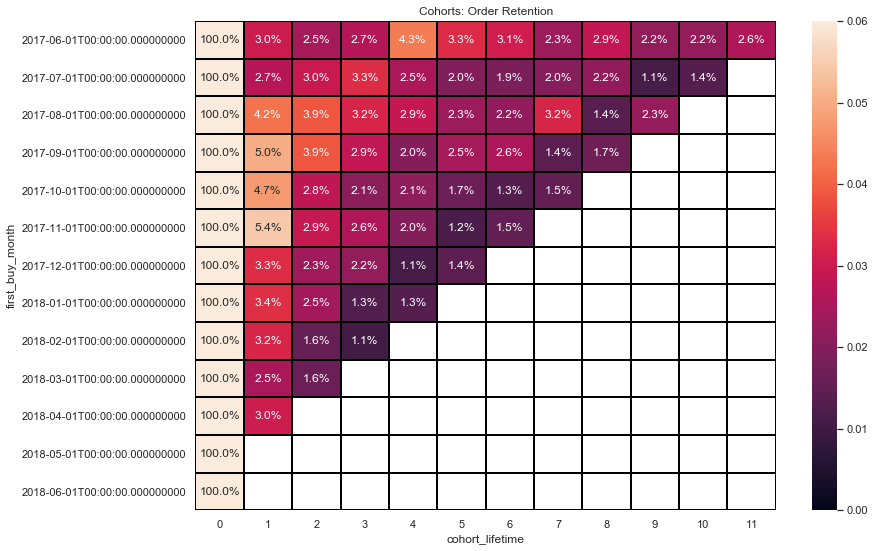

In [84]:
#from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Order Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black', vmin= 0, vmax= 0.06)

Retention в течение всего периода очень низкий. Рост показателя Retention наблюдаются в летних когортах к октябрю месяцу, в целом же показатель падает с каждым последующим месяцем.

Ситуация, аналогичная с retention'ом по посетителям сайта: тройка октябрь-ноябрь-декабрь характеризуется резким ростом в количестве заказов относительно других месяцев. 

In [85]:
order_per_person = order.groupby('buy_month').agg({'uid':['nunique', 'count']})
order_per_person.columns = ['amount_of_buyers', 'amount_of_orders']
order_per_person

,amount_of_buyers,amount_of_orders
buy_month,,
2017-06-01,2023,2354
2017-07-01,1984,2363
2017-08-01,1472,1807
2017-09-01,2750,3387
2017-10-01,4675,5679
2017-11-01,4547,5659
2017-12-01,4942,6218
2018-01-01,3898,4721
2018-02-01,4258,5281


In [86]:
order_per_person['order_per_person'] = order_per_person['amount_of_orders'] / order_per_person['amount_of_buyers']
order_per_person

,amount_of_buyers,amount_of_orders,order_per_person
buy_month,,,
2017-06-01,2023,2354,1.163618
2017-07-01,1984,2363,1.191028
2017-08-01,1472,1807,1.227582
2017-09-01,2750,3387,1.231636
2017-10-01,4675,5679,1.214759
2017-11-01,4547,5659,1.244557
2017-12-01,4942,6218,1.258195
2018-01-01,3898,4721,1.211134
2018-02-01,4258,5281,1.240254


In [87]:
order_per_person['order_per_person'].mean()

1.2058233446244648

В среднем за период одним покупателем совершается 1.2 покупки. Это означает, что, как правило, большинство покупателей не совершают повторную покупку в этот же месяц 

### Какой средний чек?

In [88]:
order

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0


In [89]:
revenue = order.groupby(['first_buy_month','buy_month']).agg({'revenue':'sum','uid':'count'})
revenue

revenue   uid
first_buy_month buy_month                 
2017-06-01      2017-06-01   9557.49  2354
                2017-07-01    981.82   177
                2017-08-01    885.34   174
                2017-09-01   1931.30   226
                2017-10-01   2068.58   292
...                              ...   ...
2018-03-01      2018-05-01   1114.87   176
2018-04-01      2018-04-01  10600.69  2495
                2018-05-01   1209.92   195
2018-05-01      2018-05-01  13925.76  3249
2018-06-01      2018-06-01      3.42     1

[79 rows x 2 columns]

In [90]:
revenue['revenue_per_order'] = revenue['revenue'] / revenue['uid']
revenue

revenue   uid  revenue_per_order
first_buy_month buy_month                                    
2017-06-01      2017-06-01   9557.49  2354           4.060106
                2017-07-01    981.82   177           5.547006
                2017-08-01    885.34   174           5.088161
                2017-09-01   1931.30   226           8.545575
                2017-10-01   2068.58   292           7.084178
...                              ...   ...                ...
2018-03-01      2018-05-01   1114.87   176           6.334489
2018-04-01      2018-04-01  10600.69  2495           4.248774
                2018-05-01   1209.92   195           6.204718
2018-05-01      2018-05-01  13925.76  3249           4.286168
2018-06-01      2018-06-01      3.42     1           3.420000

[79 rows x 3 columns]

In [91]:
revenue.pivot_table(index='first_buy_month', columns='buy_month', values='revenue_per_order', aggfunc='mean')

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093,NaN
2017-07-01,NaN,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,NaN,NaN,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN
2017-09-01,NaN,NaN,NaN,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN
2017-10-01,NaN,NaN,NaN,NaN,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687417,4.438482,6.454969,7.524844,2.711282,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.706266,4.576486,3.453735,3.867143,NaN


In [92]:
revenue = revenue.reset_index()
revenue['cohort_lifetime'] = revenue['buy_month'] - revenue['first_buy_month']
revenue

,first_buy_month,buy_month,revenue,uid,revenue_per_order,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2354,4.060106,0 days
1,2017-06-01,2017-07-01,981.82,177,5.547006,30 days
2,2017-06-01,2017-08-01,885.34,174,5.088161,61 days
3,2017-06-01,2017-09-01,1931.30,226,8.545575,92 days
4,2017-06-01,2017-10-01,2068.58,292,7.084178,122 days
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,176,6.334489,61 days
75,2018-04-01,2018-04-01,10600.69,2495,4.248774,0 days
76,2018-04-01,2018-05-01,1209.92,195,6.204718,30 days
77,2018-05-01,2018-05-01,13925.76,3249,4.286168,0 days


In [93]:
revenue['cohort_lifetime'] = revenue['cohort_lifetime'] / np.timedelta64(1,'M')
revenue['cohort_lifetime'] = revenue['cohort_lifetime'].round().astype('int')
revenue

,first_buy_month,buy_month,revenue,uid,revenue_per_order,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2354,4.060106,0
1,2017-06-01,2017-07-01,981.82,177,5.547006,1
2,2017-06-01,2017-08-01,885.34,174,5.088161,2
3,2017-06-01,2017-09-01,1931.30,226,8.545575,3
4,2017-06-01,2017-10-01,2068.58,292,7.084178,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,176,6.334489,2
75,2018-04-01,2018-04-01,10600.69,2495,4.248774,0
76,2018-04-01,2018-05-01,1209.92,195,6.204718,1
77,2018-05-01,2018-05-01,13925.76,3249,4.286168,0


In [94]:
revenue_pivot = revenue.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='revenue_per_order', aggfunc='mean')
revenue_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07-01,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN,NaN
2017-09-01,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN,NaN,NaN
2017-10-01,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN,NaN,NaN,NaN
2017-11-01,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.687417,4.438482,6.454969,7.524844,2.711282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.706266,4.576486,3.453735,3.867143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


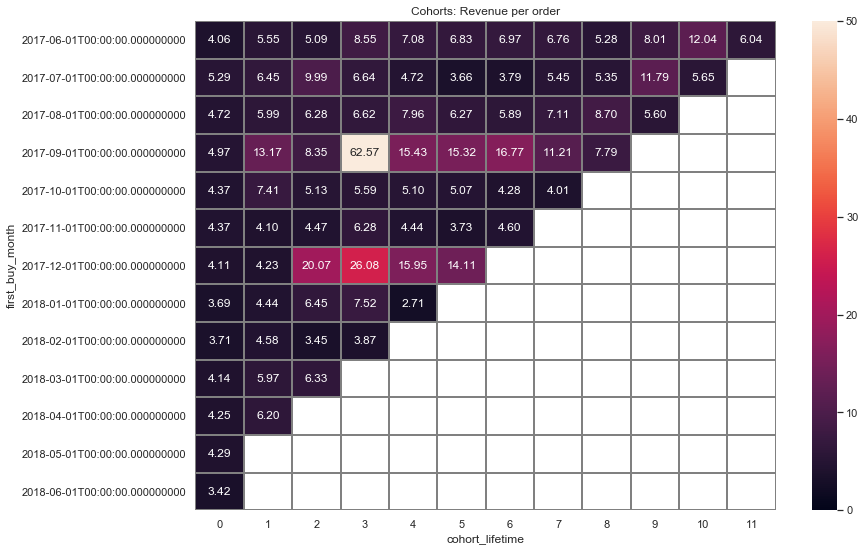

In [95]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Revenue per order')
sns.heatmap(revenue_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin = 0, vmax = 50)

In [96]:
print(order['revenue'].median())
print(order['revenue'].mean())
print(order['revenue'].max())

2.5
4.999646930476993
2633.28


In [97]:
order[order['revenue'] == 2633.28]

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
23244,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-09-20 19:55:00,2017-12-01,2017-09-01,3


Средний чек заказа ведёт себя нестабильно. 

Интерес представляет Сентябрьская и Декабрьская когорты: там наблюдается значительный скачок среднего чека вверх после первого месяца покупки.

В Сентябрьской когорте на 3-ий месяц использования (в декабре) средний чек составил 62.57 условных единиц. 
Объясняется это тем, что максимальное значение покупки в 2633.28 было совершено как раз таки пользователем из сентябрьской когорты.

### Сколько денег приносят? (LTV)

In [98]:
order.head()

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [99]:
first_orders = order.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_month']
print(first_orders.head())

                uid first_buy_month
0   313578113262317      2018-01-01
1  1575281904278712      2017-06-01
2  2429014661409475      2017-10-01
3  2464366381792757      2018-01-01
4  2551852515556206      2017-11-01


In [100]:
initial_buyer_count

,first_buy_month,cohort_buyers
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [101]:
ltv_cohorts = order.groupby(['first_buy_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
ltv_cohorts 

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [102]:
report = pd.merge(ltv_cohorts, initial_buyer_count, on='first_buy_month')
report

,first_buy_month,buy_month,revenue,cohort_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


In [103]:
report['lifetime'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['lifetime'] = report['lifetime'].round().astype('int')

In [104]:
report 

,first_buy_month,buy_month,revenue,cohort_buyers,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,0
1,2017-06-01,2017-07-01,981.82,2023,1
2,2017-06-01,2017-08-01,885.34,2023,2
3,2017-06-01,2017-09-01,1931.30,2023,3
4,2017-06-01,2017-10-01,2068.58,2023,4
...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2
75,2018-04-01,2018-04-01,10600.69,2276,0
76,2018-04-01,2018-05-01,1209.92,2276,1
77,2018-05-01,2018-05-01,13925.76,2988,0


In [105]:
report['ltv'] = report['revenue'] / report['cohort_buyers']
report

,first_buy_month,buy_month,revenue,cohort_buyers,lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [106]:
ltv_pivot = report.pivot_table(index='first_buy_month', columns = 'lifetime', values='ltv')
ltv_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
ltv_pivot['total_ltv'] = ltv_pivot.sum(axis=1)

In [108]:
ltv_pivot.round(2)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,total_ltv
first_buy_month,,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26,11.88
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN,8.39
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN,8.47
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN,13.44
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN,6.36
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN,6.40
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN,7.64
2018-01-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.94
2018-02-01,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.59


Лучше всего себя показывает июньская когорта. Конечно же она существует дольше всех, но тем не менее, судя по ежемесячному приросту LTV едва ли другие когорты смогут достичь того же показателя. 

Сентябрьскую когорту в счет брать не будем. Все-таки там уникальный случай с (новогодней?) покупкой на очень крупную сумму, которая искусственно (и искусно!) завысила результат. 

## <a id='step_2.3'> Маркетинг
### Сколько денег потратили? Всего / на каждый источник / по времени


In [109]:
cost

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [110]:
cost['costs'].sum() #всего

329131.62

In [111]:
source_cost = cost.groupby('source_id')['costs'].sum().reset_index() # по источникам
source_cost.sort_values(by='costs', ascending = False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


Text(0, 0.5, 'Затраты')

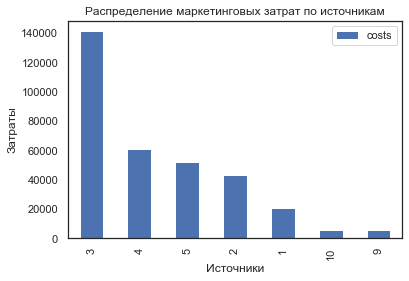

In [112]:
source_cost.sort_values(by='costs', ascending = False).plot(kind='bar', x='source_id', y='costs', title ='Распределение маркетинговых затрат по источникам')
plt.xlabel('Источники')
plt.ylabel('Затраты')

Отмечаем для себя огромные затраты на источник №3, а также источники №4, №5 и №2. 

In [113]:
cost['cost_month'] = cost['dt'].astype('datetime64[M]')

In [114]:
cost

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [115]:
cost.groupby('cost_month')['costs'].sum() #в каждый месяц

cost_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Text(0, 0.5, 'Затраты')

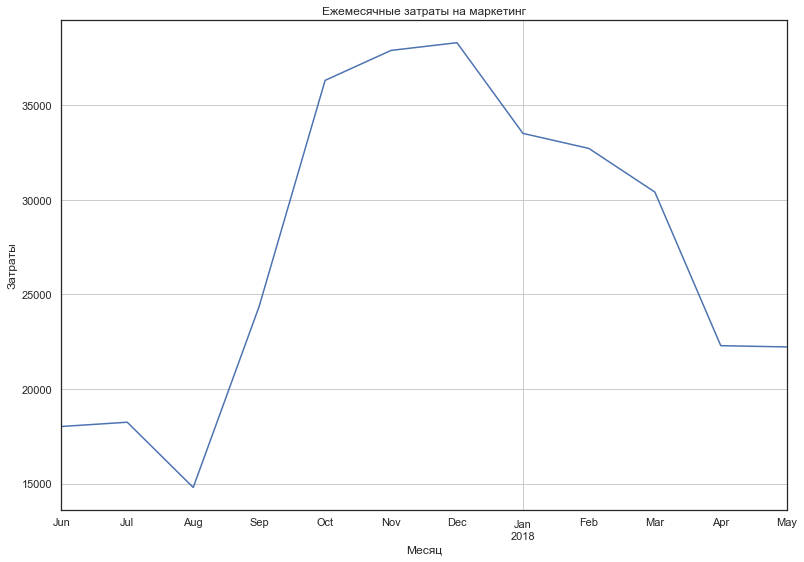

In [116]:
cost.groupby('cost_month')['costs'].sum().plot(kind='line', grid=True, figsize = (13, 9), title ='Ежемесячные затраты на маркетинг')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

In [117]:
cost.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum') #каждый месяц по источникам

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


### Сколько стоило привлечение одного покупателя из каждого источника?

In [118]:
visit.head()

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,duration,first_visit_date,visit_month,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [119]:
source_amount = visit.groupby('source_id')['uid'].agg('nunique').reset_index()
source_amount.sort_values(by='uid', ascending=False)

,source_id,uid
3,4,83525
2,3,74756
4,5,56974
1,2,26245
0,1,18999
7,9,9264
8,10,8067
6,7,34
5,6,6


Та же четверка источников в топе: №4, №3, №5 и №2. Пока всё закономерно: больше вложились в эти источники -> большая отдача в виде посетителей именно от этих же источников 

In [120]:
cac_per_source = source_amount.merge(source_cost, on ='source_id')
cac_per_source 

,source_id,uid,costs
0,1,18999,20833.27
1,2,26245,42806.04
2,3,74756,141321.63
3,4,83525,61073.60
4,5,56974,51757.10
5,9,9264,5517.49
6,10,8067,5822.49


In [121]:
cac_per_source['cac'] = cac_per_source['costs'] / cac_per_source['uid']
cac_per_source

,source_id,uid,costs,cac
0,1,18999,20833.27,1.096546
1,2,26245,42806.04,1.631017
2,3,74756,141321.63,1.890439
3,4,83525,61073.60,0.731201
4,5,56974,51757.10,0.908434
5,9,9264,5517.49,0.595584
6,10,8067,5822.49,0.721766


In [122]:
cac_per_source = cac_per_source[['source_id', 'cac']]
cac_per_source.sort_values(by='cac', ascending=False)

,source_id,cac
2,3,1.890439
1,2,1.631017
0,1,1.096546
4,5,0.908434
3,4,0.731201
6,10,0.721766
5,9,0.595584


Здесь наконец проясняется картина. Источник №3, который привел наибольшее количество посетителей на сайт является наиболее дорогостоящим. Источник №2 также достаточно дорогой в плане привлечения. Закономерно урезать бюджет данных источников в пользу других источников (№4 и №5). 

Источник №4, с помощью которого на сайт зашло чуть меньшее количество пользователей (относительно источника №3), является одним из самых дешевых каналов привлечения. 
Правильнее будет сказать не "дешевый", а эффективный. Затратили мало, а получили огромный поток посетителей. Так держать!  

Заметно, что в таблице отсутствуют затраты на источники №6, №7 и №8. 8 отсутствует и в таблице с посещениями. А вот источники №6 и №7 скорее всего являются формами сарафанного радио. Хоть это и бесплатный канал привлечения, привели они достаточно мало посетителей. 

Учитывая это, столь большой вклад денег в канал 3 мог быть намеренным шагом: привлечь как можно больше пользователей, а затем, когда наберется большая база пользователей, ожидать, что доброе слово о продукте разнесется самими пользователями.
Не сработало: судя по Retention Rate, пользователи неохотно возвращались и вряд ли будут рекомендовать пользоваться сервисом своим знакомым. 

### На сколько окупились расходы? (ROI)

In [123]:
monthly_cost = cost.groupby('cost_month')['costs'].sum()
monthly_cost

cost_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

In [124]:
report

,first_buy_month,buy_month,revenue,cohort_buyers,lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [125]:
report_new = pd.merge(report, monthly_cost, left_on='first_buy_month', right_on='cost_month')
report_new

,first_buy_month,buy_month,revenue,cohort_buyers,lifetime,ltv,costs
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,18015.00
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,18015.00
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,18015.00
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,18015.00
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,18015.00
...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.300892,30415.27
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,30415.27
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,22289.38
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,22289.38


In [126]:
report_new['cac'] = report_new['costs'] / report_new['cohort_buyers']
report_new

,first_buy_month,buy_month,revenue,cohort_buyers,lifetime,ltv,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,18015.00,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,18015.00,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,18015.00,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.300892,30415.27,8.608907
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,30415.27,8.608907
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,22289.38,9.793225
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,22289.38,9.793225


In [127]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [128]:
output = report_new.pivot_table(
        index='first_buy_month', 
        columns='lifetime', 
        values='romi', 
        aggfunc='mean')

output

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.530530,0.054500,0.049145,0.107205,0.114825,0.082593,0.106730,0.065310,0.062123,0.068027,0.064150,0.028844
2017-07-01,0.633623,0.035339,0.065735,0.037845,0.018638,0.016451,0.012673,0.014951,0.016998,0.015513,0.016412,NaN
2017-08-01,0.488747,0.043719,0.042468,0.036243,0.045762,0.026263,0.019513,0.037515,0.027067,0.017412,NaN,NaN
2017-09-01,0.597833,0.118368,0.055174,0.421091,0.042425,0.068533,0.074310,0.025753,0.019489,NaN,NaN,NaN
2017-10-01,0.597866,0.064015,0.022869,0.018776,0.018109,0.014381,0.010134,0.013797,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.042980,0.021483,0.034983,0.015934,0.005800,0.012373,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.029785,0.105824,0.121860,0.035797,0.038670,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.029662,0.030620,0.014368,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.031048,0.008760,0.008272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
output.cumsum(axis=1).round(2)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
output.cumsum(axis=1).mean(axis=0)

lifetime
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Успели окупиться всего лишь две когорты: июньская (на 7-ой месяц) и сентябрьская (на 4-ый месяц, а всё благодаря пользователю 5539673724080479777 с покупкой в 2633.28 у.е.). 

Приведенный выше расчет предполагает, что средняя когорта окупается к 11 месяцу. Тем не менее, окупаемость июньской и сентябрьской когорт выглядит скорее исключением из правил. 
К 11 месяцу судя по расчетам имеет шансы окупиться лишь декабрьская когорта. 

## <a id='step_3'> Шаг 3. Вывод. Рекомендации маркетологам, куда и сколько им стоит вкладывать денег

Маркетологам стоит уделить больше внимания (денег :)) источникам №4 и №5. Они на практике показали себя эффективными с точки зрения затрат.

Источники №9 и №10 также являются "дешевыми". Тем не менее, затрачено на эти источники было слишком мало средств. Возможно эти источники плохо масштабируются: стоимость привлечения каждого последующего клиента будет стоить большего количества денег. Маркетологам должно быть известней :) 

В таком случае, небольшие затраты на эти источники оправданы: хоть и небольше количество посетителей, но и денег на них затрачивается мало. 
________________________
Посмотреть маркетинговые расходы в разрезе платформ не удается. Здравый смысл подсказывает, что людям проще совершать покупки с десктопных устройств. А зайти на сайт и посмотреть что он из себя представляет можно с обеих платформ. 

Также помним, что средняя(медианная) продолжительность сессии составляет 5 минут. То есть половина сессии проходят в течение 5-ти минут, а вторая половина сессий имеет продолжительность в более 5 минут.

А это значит, что достаточно большое количество пользователей проводят на сайте больше 5 минут. Вряд ли это будут пользователи мобильных устройств. Читать, воспринимать информацию длительное время (а сейчас удерживать внимание 5+ минут уже достаточно долго) удобнее с монитора, а не экрана смартфона. Пусть это даже описание кино или концерта  

Поэтому всё-таки приоритет в распределении маркетингового бюджета отдаю декстопным устройствам. 